In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
sys.path.append('vae')
from model import init_specific_model
from losses import Loss
from dset import get_dataloaders
from training import Trainer
from utils import *
import pickle as pkl
import pandas as pd
import seaborn as sns
from sim_gaussian_mixture import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
p.num_epochs = 100
p.seed = 10
p.hidden_dim = 7
p.eps = 0.1
p.beta = 0
p.attr = np.round(np.linspace(0.1, 5, 5), 3)[0]
p.dirname = 'vary_attr2'

# seed
random.seed(p.seed)
np.random.seed(p.seed)
torch.manual_seed(p.seed)

# GET DATALOADERS
(train_loader, train_latents), (test_loader, test_latents) = define_dataloaders(p)

# PREPARES MODEL
model = init_specific_model(orig_dim=p.orig_dim, latent_dim=p.latent_dim, hidden_dim=p.hidden_dim).to(device)
model.load_state_dict(torch.load("results/vary_attr2_seed=10/beta=0.0_attr=5.0_tc=0_seed=10_hdim=7_pid=80420138379113712452.pth"))

# EVALUATE TEST DATA
data = test_loader.dataset.data.to(device)
recon_data, latent_dist, latent_sample = model(data)

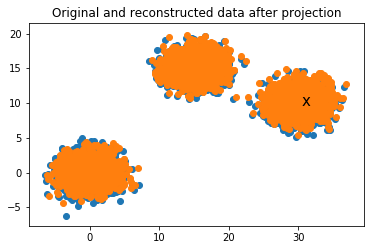

In [160]:
ind = 2000
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
pt = data[ind:ind+1][:,:2]
plt.annotate("x", pt[0], size=15)
plt.show()

# GET TRAVERSAL
decoded_traversal = traversals(model, data=data[ind:ind+1], n_latents=4)
# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]

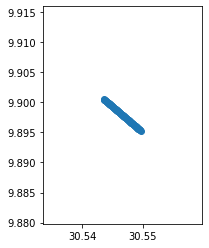

In [161]:
plot_2d_samples(decoded_traversal0[:100])

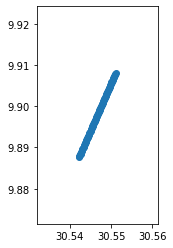

In [162]:
plot_2d_samples(decoded_traversal0[100:200])

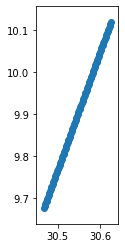

In [163]:
plot_2d_samples(decoded_traversal0[200:300])

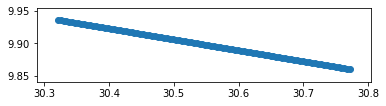

In [164]:
plot_2d_samples(decoded_traversal0[300:400])

In [159]:
loss_f = Loss(beta=p.beta, attr=p.attr, alpha=p.alpha, gamma=p.gamma, tc=p.tc, eps=p.eps, p_batch_size=p.p_batch_size, is_mss=True)
rec_loss, kl_loss, mi_loss, tc_loss, dw_kl_loss, attr_loss = calc_losses(model, test_loader, loss_f)
s.reconstruction_loss = rec_loss
s.kl_normal_loss = kl_loss
s.total_correlation = tc_loss
s.mutual_information = mi_loss
s.dimensionwise_kl_loss = dw_kl_loss
s.attribution_loss = attr_loss
s.disentanglement_metric = calc_disentangle_metric(model, test_loader).mean()
s.net = model
print(s.disentanglement_metric)

tensor(0.1029)
